## audio example

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import read

from waflgp import *
import utils 

In [2]:
#choose a random file (50 examples attached for the Reviewer's convenience)
i = np.random.randint(0, 49)
file1 = f'free-spoken-digit-dataset-1.0.9/recordings/9_jackson_{i}.wav'
print(f'chosen file: {i}')
a1 = read(file1)
audio_tr = np.array(a1[1],dtype=float)
audio_tr = (audio_tr-np.mean(audio_tr))/np.std(audio_tr)

chosen file: 8


Text(0.5, 1.0, 'chosen audio file: 9_jackson_8.wav')

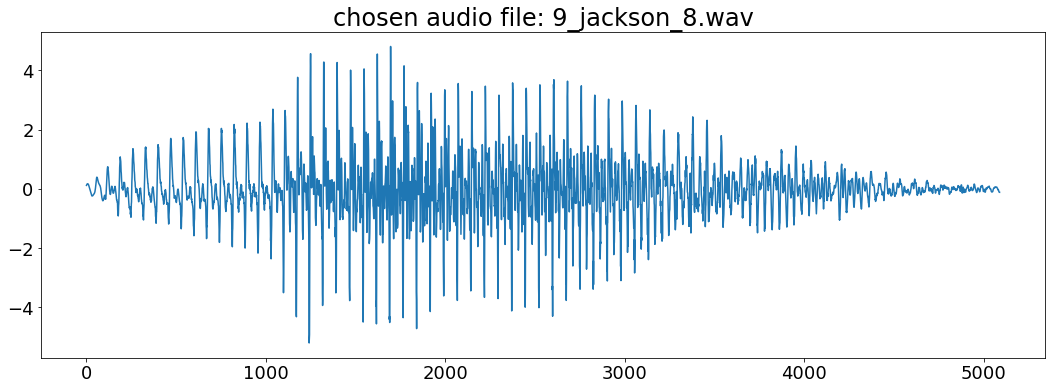

In [3]:
#plot file
plt.figure(figsize=(18,6))
plt.plot(audio_tr)
plt.title(f'chosen audio file: 9_jackson_{i}.wav')

Optimization terminated successfully.
         Current function value: 0.461658
         Iterations: 9
         Function evaluations: 12672
L1-ok
Optimization terminated successfully.
         Current function value: 0.008984
         Iterations: 80
         Function evaluations: 68879
L2-ok
Optimization terminated successfully.
         Current function value: 1.352446
         Iterations: 295
         Function evaluations: 375855
W1-ok
Optimization terminated successfully.
         Current function value: 0.033334
         Iterations: 6
         Function evaluations: 12554
W2-ok


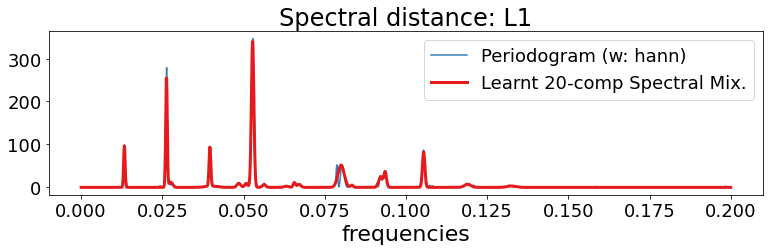

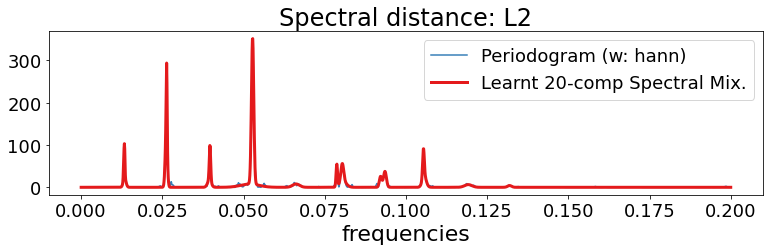

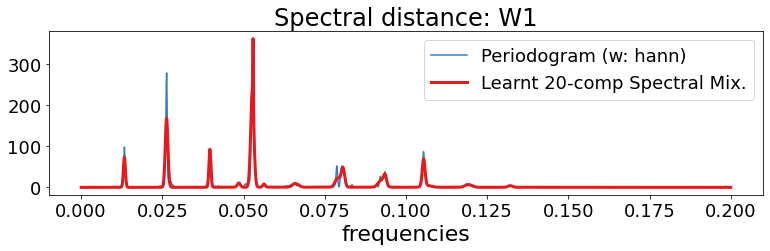

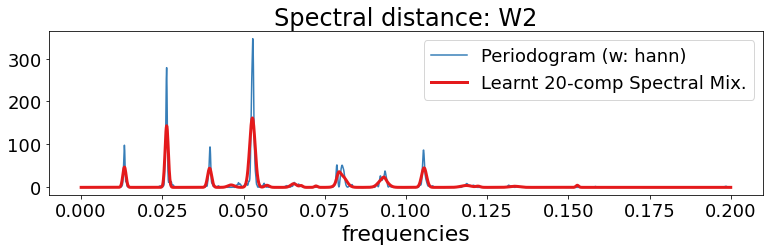

In [4]:
#train SLGP
q = 20
freqs = np.linspace(0,0.2,2000)
a_tr = audio_tr

for metric in ['L1', 'L2', 'W1', 'W2']:
    gp = waflgp(space_output=a_tr, aim = 'learning', kernel = 'qSM')
    gp.real_world = True #this removes the spectral floor
    gp.w_noise = True #this uses the spectral floor as the estimates noise variance
    gp.set_freqs(freqs)
    gp.train_WL(method = 'periodogram', window='hann', metric = metric, nbins=1, order=q)

    #plots
    gp.plot_psd(title = f'Spectral distance: {metric}')